# Deep learning, reconocimiento de imagenes 

## Carga de librerias 

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Carga de dataset

In [2]:
# obtenemos el nombre de las primeras etiquetas seleccionadas
style_label_file = 'data/flickr_style/style_names.txt'
style_labels = np.loadtxt(style_label_file, dtype=str)
print(style_labels)

['Detailed' 'Pastel' 'Melancholy' 'Noir' 'HDR']


In [3]:
# cargamos los datos de train
train_frame = pd.read_csv('data/flickr_style/train.txt', sep=" ", header=None)
train_frame.columns = ['files','labels_idx']
train_frame['labels'] = train_frame['labels_idx'].map({i:j for i,j in enumerate(style_labels)})

train_frame.head()

,files,labels_idx,labels
0,data/flickr_style/images/2216312257_2ba4af8439...,3,Noir
1,data/flickr_style/images/1247783411_4b3332a10f...,3,Noir
2,data/flickr_style/images/12981126664_676c39228...,2,Melancholy
3,data/flickr_style/images/1184077873_911026e6ae...,3,Noir
4,data/flickr_style/images/8947602754_24140f40c5...,1,Pastel


In [4]:
# cargamos los datos de test
test_frame = pd.read_csv('data/flickr_style/test.txt', sep=" ", header=None)
test_frame.columns = ['files','labels_idx']
test_frame['labels'] = test_frame['labels_idx'].map({i:j for i,j in enumerate(style_labels)})

test_frame.head()

,files,labels_idx,labels
0,data/flickr_style/images/13059448154_d5ddf02da...,1,Pastel
1,data/flickr_style/images/13091035063_b32ef5213...,2,Melancholy
2,data/flickr_style/images/13230679494_88e5182c8...,4,HDR
3,data/flickr_style/images/12751269395_64f990535...,2,Melancholy
4,data/flickr_style/images/13285760404_05e737a5d...,2,Melancholy


## Red convolucional 

In [5]:
def load_img(img_path):
    # cargamos y redimensionamos una imágen
    img = tf.keras.utils.load_img(
        img_path,
        target_size=(150, 150, 3) 
    )
    
    # cambiamos el tipo imagen a un numpy.array
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    
    # normalizamos los valores entre 0 y 1
    return img_array / 255

:Ahora vamos a cargar las imágenes para poder entrenar nuestras redes convolucionales:

In [6]:
# cargamos las imágenes ya transformadas
x_train = np.array([load_img(img_path) for img_path in train_frame['files']])
x_test = np.array([load_img(img_path) for img_path in test_frame['files']])

# cargamos las clases de cada imagen
y_train = train_frame['labels_idx']
y_test = test_frame['labels_idx']

## Arquitectura

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), padding="same", activation="relu", input_shape=(150,150,3)),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding="same"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(5, activation="softmax")
])

C:\Users\taoiz\Desktop\Proyecto 2\p2\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## configuracion de modelo

In [8]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 150, 150, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 75, 75, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 90000)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       5,760,064 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 5)                   │             165 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,762,757 (21.98 MB)

 Trainable params: 5,762,757 (21.98 MB)

 Non-trainable params: 0 (0.00 B)

Evalua el modelo con el conjunto de test y muestra en una gráfica la evolución del entrenamiento:

In [9]:
hist = model.fit(x=x_train, y=y_train, epochs=10, validation_split=0.2)

Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.2672 - loss: 3.9571 - val_accuracy: 0.3321 - val_loss: 1.6112
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.4623 - loss: 1.2827 - val_accuracy: 0.5271 - val_loss: 1.2509
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.6428 - loss: 0.9590 - val_accuracy: 0.4946 - val_loss: 1.2663
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.7430 - loss: 0.8033 - val_accuracy: 0.5668 - val_loss: 1.1690
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.8350 - loss: 0.5894 - val_accuracy: 0.5379 - val_loss: 1.2135
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.8941 - loss: 0.4379 - val_accuracy: 0.4982 - val_loss: 1.3073
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9429 - loss: 0.2743 - val_accuracy: 0.4982 - val_loss: 1.3245
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9597 - loss: 0.2236 - val_accuracy: 0.5090 - v

## Evaluacion de modelo
Evalua el modelo con el conjunto de test y muestra en una gráfica la evolución del entrenamiento:

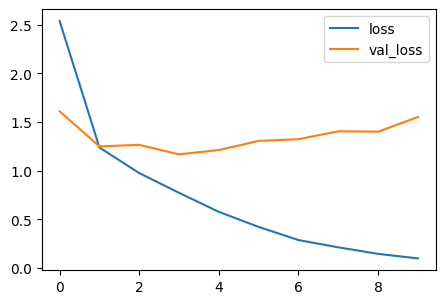

In [10]:
fig=plt.figure(figsize=(60, 40))
fig.add_subplot(10, 10, 2)
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')

plt.legend()
plt.show()

Se evalua la precision

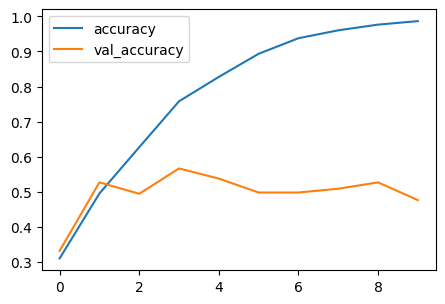

In [11]:
fig=plt.figure(figsize=(60, 40))
fig.add_subplot(10, 10, 2)
plt.plot(hist.history['accuracy'], label='accuracy')
plt.plot(hist.history['val_accuracy'], label='val_accuracy')

plt.legend()
plt.show()

Se crea una imagen para ilustrar y ver la etiqueta

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


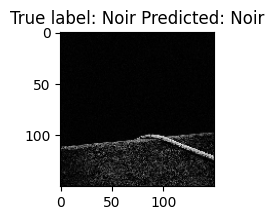

In [12]:
i = np.random.choice(range(0,x_test.shape[0]))
prediction = model.predict(np.array([x_test[i]])).argmax(axis=1)[0]

plt.figure(figsize=(2, 2))
plt.imshow(x_test[i])
plt.title("True label: %s Predicted: %s" % (style_labels[y_test[i]], style_labels[prediction]));

el modelo probablemente está sobreajustado (overfitting). Es decir, se ha ajustado demasiado bien a los datos de entrenamiento, pero no funciona igual de bien con datos nuevos (de validación).

## Arquitectura

In [13]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), padding="same", activation="relu", input_shape=(150,150,3)),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding="same"),
    tf.keras.layers.Conv2D(32, (3, 3), padding="same", activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding="same"),
    tf.keras.layers.Conv2D(32, (3, 3), padding="same", activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding="same"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dropout(0.75),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dropout(0.60),
    tf.keras.layers.Dense(10, activation="softmax")
])

## configuracion de modelo

In [14]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 150, 150, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 75, 75, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 75, 75, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 38, 38, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 38, 38, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 19, 19, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 11552)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │         739,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 772,362 (2.95 MB)

 Trainable params: 772,362 (2.95 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
hist = model.fit(x=x_train, y=y_train, epochs=50, validation_split=0.2)

Epoch 1/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 91ms/step - accuracy: 0.1311 - loss: 2.2430 - val_accuracy: 0.1841 - val_loss: 2.0512
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - accuracy: 0.2105 - loss: 2.0572 - val_accuracy: 0.2274 - val_loss: 1.8857
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - accuracy: 0.2220 - loss: 1.9440 - val_accuracy: 0.2238 - val_loss: 1.7658
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - accuracy: 0.1792 - loss: 1.9191 - val_accuracy: 0.3357 - val_loss: 1.6280
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.2629 - loss: 1.7845 - val_accuracy: 0.4079 - val_loss: 1.6094
Epoch 6/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.2328 - loss: 1.7431 - val_accuracy: 0.3899 - val_loss: 1.5809
Epoch 7/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - accuracy: 0.2340 - loss: 1.6993 - val_accuracy: 0.3827 - val_loss: 1.5157
Epoch 8/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 90ms/step - accuracy: 0.2997 - loss: 1.6384 - val_accuracy: 0.3249 - v

## Evaluacion de modelo

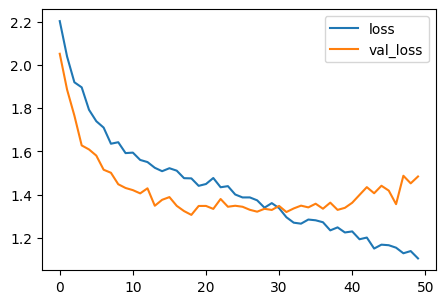

In [16]:
fig=plt.figure(figsize=(60, 40))
fig.add_subplot(10, 10, 2)
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')

plt.legend()
plt.show()

Se evalua la precision

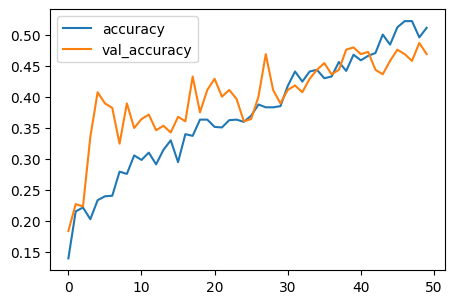

In [17]:
fig=plt.figure(figsize=(60, 40))
fig.add_subplot(10, 10, 2)
plt.plot(hist.history['accuracy'], label='accuracy')
plt.plot(hist.history['val_accuracy'], label='val_accuracy')

plt.legend()
plt.show()

Imagen para ilustrar y ver la etiqueta asignada como la real 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


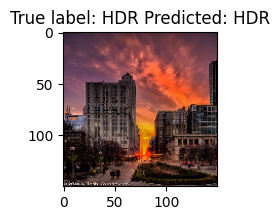

In [18]:
i = np.random.choice(range(0,x_test.shape[0]))
prediction = model.predict(np.array([x_test[i]])).argmax(axis=1)[0]

plt.figure(figsize=(2, 2))
plt.imshow(x_test[i])
plt.title("True label: %s Predicted: %s" % (style_labels[y_test[i]], style_labels[prediction]));

Al examinar los epochs tan solo la precisión al final no llega al 50, lo cual al no pasar este limite se descarat el modelo, un modelo para que pueda ser tomado en cuneta o tomar como aceptable debería de esta al menos al 60, el modelo funciona adeciadamenmte pero no sa los resultados optimos

## Red pre-entrenada

se realizara experimento usando la técnica de _fine-tuning_ y utilizando el modelo pre-entrenado de [_InceptionV3_](https://www.tensorflow.org/api_docs/python/tf/keras/applications/inception_v3/InceptionV3)

In [19]:
def load_img_inceptionv3(img_path):
    img = tf.keras.utils.load_img(
        img_path,
        target_size=(299, 299, 3) 
    )
    
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    
    return tf.keras.applications.inception_v3.preprocess_input(img_array)

In [20]:
img = load_img_inceptionv3('data/flickr_style/images/2216312257_2ba4af8439.jpg')
img[0,0,0]

-0.5529412

In [21]:
# cargamos las imágenes ya transformadas
x_train = np.array([load_img_inceptionv3(img_path) for img_path in train_frame['files']])
x_test = np.array([load_img_inceptionv3(img_path) for img_path in test_frame['files']])

# cargamos las clases de cada imagen
y_train = train_frame['labels_idx']
y_test = test_frame['labels_idx']

In [22]:
x_train[0,0,0], y_train[0]

(array([-0.5529412, -0.5529412, -0.5372549], dtype=float32), 3)

## cargar el modelo pre-entrenado InceptionV3

In [23]:
base_model = tf.keras.applications.InceptionV3(
    input_shape=(299,299,3),
    include_top=False,
    pooling='avg'
)

# y congelamos el entrenamiento en todas las capas
for layer in base_model.layers:
    layer.trainable = False

In [24]:
base_model.layers[-2:]

[<Concatenate name=mixed10, built=True>,
 <GlobalAveragePooling2D name=global_average_pooling2d, built=True>]

## añadir capas al modelo (_fine-tuning_)

In [25]:
x1 = tf.keras.layers.Dropout(0.6)(base_model.output)
x2 = tf.keras.layers.Dense(128, activation='relu')(x1)
x3 = tf.keras.layers.Dropout(0.4)(x2)
x4 = tf.keras.layers.Dense(5, activation='softmax', name='flickr_dropout')(x3)

model = tf.keras.Model(base_model.input, x4)

In [26]:
model.layers[-4:]

[<Dropout name=dropout_2, built=True>,
 <Dense name=dense_7, built=True>,
 <Dropout name=dropout_3, built=True>,
 <Dense name=flickr_dropout, built=True>]

## entrenar el modelo

In [27]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [28]:
hist = model.fit(x=x_train, y=y_train, epochs=25, validation_split=0.2)

Epoch 1/25
35/35 ━━━━━━━━━━━━━━━━━━━━ 31s 797ms/step - accuracy: 0.2701 - loss: 1.8225 - val_accuracy: 0.5126 - val_loss: 1.3437
Epoch 2/25
35/35 ━━━━━━━━━━━━━━━━━━━━ 27s 771ms/step - accuracy: 0.4451 - loss: 1.3493 - val_accuracy: 0.5090 - val_loss: 1.2073
Epoch 3/25
35/35 ━━━━━━━━━━━━━━━━━━━━ 27s 765ms/step - accuracy: 0.5119 - loss: 1.2291 - val_accuracy: 0.5415 - val_loss: 1.1702
Epoch 4/25
35/35 ━━━━━━━━━━━━━━━━━━━━ 27s 766ms/step - accuracy: 0.5160 - loss: 1.1957 - val_accuracy: 0.5162 - val_loss: 1.1673
Epoch 5/25
35/35 ━━━━━━━━━━━━━━━━━━━━ 27s 771ms/step - accuracy: 0.5354 - loss: 1.1073 - val_accuracy: 0.5812 - val_loss: 1.1014
Epoch 6/25
35/35 ━━━━━━━━━━━━━━━━━━━━ 27s 768ms/step - accuracy: 0.5730 - loss: 1.0497 - val_accuracy: 0.5884 - val_loss: 1.0713
Epoch 7/25
35/35 ━━━━━━━━━━━━━━━━━━━━ 27s 770ms/step - accuracy: 0.5886 - loss: 1.0267 - val_accuracy: 0.6173 - val_loss: 1.0630
Epoch 8/25
35/35 ━━━━━━━━━━━━━━━━━━━━ 27s 768ms/step - accuracy: 0.6083 - loss: 0.9719 - val_accu

## evaluar el modelo

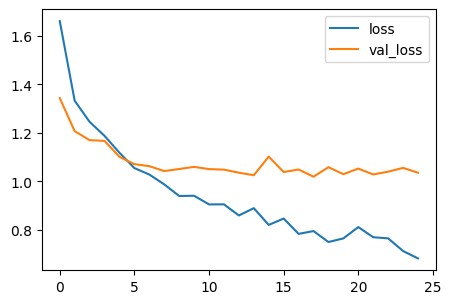

In [29]:
fig=plt.figure(figsize=(60, 40))
fig.add_subplot(10, 10, 2)
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')

plt.legend()
plt.show()

Se evalua la precision

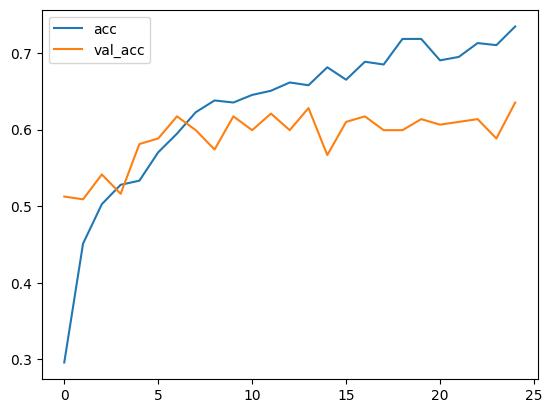

In [30]:
fig.add_subplot(10, 10, 1)
plt.plot(hist.history['accuracy'], label='acc')
plt.plot(hist.history['val_accuracy'], label='val_acc')
plt.legend()

plt.legend()
plt.show()

Imagen para ilustrar y ver la etiqueta asignada como la real 

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].


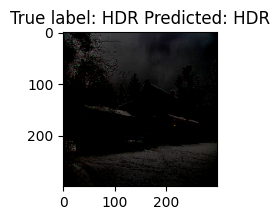

In [31]:
i = np.random.choice(range(0,x_test.shape[0]))
prediction = model.predict(np.array([x_test[i]])).argmax(axis=1)[0]

plt.figure(figsize=(2, 2))
plt.imshow(x_test[i])
plt.title("True label: %s Predicted: %s" % (style_labels[y_test[i]], style_labels[prediction]));

Este modelo resulto mejor que el anterior iniciando aun mas bajo per superando el 50 y llegando hasta los 70s, por lo cual es aceptable pero menos preciso que el primero, faltaria ver si con mas redes o ajustes se podria mejorar 

El mejor modelo es el 3 con el fine tuning, por lo cual se llevara a produccion, el primero al estar sobre entrenado no serviria con nuevos datos 

In [32]:
model.save('saved_model/my_model.h5')